In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True))


{
  "data": {
    "1": {
      "circulating_supply": 18924625,
      "id": 1,
      "last_updated": 1641775366,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 797629902171,
          "percent_change_1h": 0.142289089423551,
          "percent_change_24h": 0.60430267315407,
          "percent_change_7d": -11.5978871459075,
          "percentage_change_1h": 0.142289089423551,
          "percentage_change_24h": 0.60430267315407,
          "percentage_change_7d": -11.5978871459075,
          "price": 41891.0,
          "volume_24h": 17850225389
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 18924625,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1641775366
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True))


{
  "data": {
    "1027": {
      "circulating_supply": 119095002,
      "id": 1027,
      "last_updated": 1641775440,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 378092239275,
          "percent_change_1h": 0.15725867905755,
          "percent_change_24h": 1.45958466881946,
          "percent_change_7d": -17.7255147841605,
          "percentage_change_1h": 0.15725867905755,
          "percentage_change_24h": 1.45958466881946,
          "percentage_change_7d": -17.7255147841605,
          "price": 3155.55,
          "volume_24h": 11818076440
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119095002,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1641775440
  }
}


In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)


41891.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


3155.55


In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)


50269.2


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)


16724.415


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


66993.61499999999


In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe for price intervals
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date 
# This provide closing prices
start_date = pd.Timestamp("2021-01-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-07", tz="America/New_York").isoformat()


In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Use df property to place data in dataframe
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Review the first 5 rows of the Alpaca DataFrame
portfolio_df.head()


AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-01-07 00:00:00-05:00  117.13  117.26  117.0667  117.21  4949593  376.1   

                                                            
                            high     low   close    volume  
time                                                        
2021-01-07 00:00:00-05:00  379.9  375.91  379.06  58862006

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df['AGG']['close'])

# Print the AGG closing price
print(agg_close_price)


117.21


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df['SPY']['close'])

# Print the SPY closing price
print(spy_close_price)


379.06


In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(agg_value)


23442.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(spy_value)


41696.6


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)



65138.6


In [22]:
# Calculate the total value of the member's entire savings portfolio (crypto + stocks/bonds)
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)


132132.215


In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[66993.61499999999, 65138.6]

In [24]:
# Create a Pandas DataFrame called savings_df with each asset class as the index and value amount as the column
savings_df = pd.DataFrame(savings_data, index = ['crypto', 'stock/bond'], columns = ['amount'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,66993.615
stock/bond,65138.600


<AxesSubplot:title={'center':'Savings Composition as of January 7th, 2021'}, ylabel='amount'>

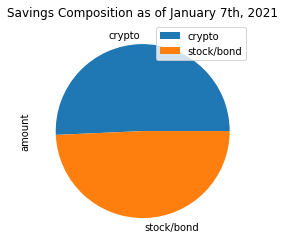

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Savings Composition as of January 7th, 2021')


In [26]:
# Create a variable named emergency_fund_value equal to 3x monthly income
emergency_fund_value = monthly_income * 3

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# One condition where the total portfolio exceeds the emergency fund value, another where it is equal to it, and another less than.
# print statement will tell you if the goal is achieved
if total_portfolio > emergency_fund_value:
    print('Congratulations, there is enough money to fund the emergency portfolio')
elif total_portfolio == emergency_fund_value:
    print('Congratulations, you have now reached your goal to fund the emergency portfolio')
else:
    print(f'You are ${emergency_fund_value-total_portfolio} away from reaching your goal.')




Congratulations, there is enough money to fund the emergency portfolio


In [28]:
# Set start and end dates for historical pricing data

start_date = pd.Timestamp("2018-01-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# Add df at the end to place data into dataframe

portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df


# Display both the first and last five rows of the DataFrame
display(portfolio_prices_df.head())
display(portfolio_prices_df.tail())


AGG                                       \
                             open    high     low     close     volume   
time                                                                     
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.0000  2842958.0   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.7100  1991045.0   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.7100  3272935.0   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.7700  2652838.0   
2018-01-12 00:00:00-05:00  108.64  108.83  108.63  108.7401  2950016.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-01-08 00:00:00-05:00  273.31  274.10  272.98  273.93  33627800  
2018-01-09 00:00:00-05:00  274.40  275.25  274.09  274.53  40421422  
2018-01-10 00:00:00-05:00  273.69  274.42  272.92  274.10  41575815  
2018-01-11 00:00:00-05:00  274.75  276.09  274.56  276.08  39159808  
2018-01-12 00:00:00-05:00  276.42  278.11  276.27  277.91  53855427

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2020-12-31 00:00:00-05:00  118.18  118.24  118.1200  118.200  4325026.0   
2021-01-04 00:00:00-05:00  118.08  118.14  117.9850  118.040  6211938.0   
2021-01-05 00:00:00-05:00  118.06  118.06  117.7500  117.915  5915389.0   
2021-01-06 00:00:00-05:00  117.90  117.90  117.1500  117.360  8587136.0   
2021-01-07 00:00:00-05:00  117.13  117.26  117.0667  117.210  4949593.0   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2020-12-31 00:00:00-05:00  371.78  374.66  371.232  373.85  52720911  
2021-01-04 00:00:00-05:00  375.31  375.45  364.820  368.85  92938087  
2021-01-05 00:00:00-05:00  368.10  372.50  368.050  371.32  53668865  
2021-01-06 00:00:00-05:00  369.71  376.98  369.120  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.90  375.910  379.06  58862006

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# For 30 years, multiply 252 trading days by 30
# The weights should be split 40% to AGG and 60% to SPY. 
# Place weight of AGG first as it is the first item in portfolio_prices_df.
# Run 500 samples.
portfolio_60_40 = MCSimulation(
    portfolio_data = portfolio_prices_df,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Review the simulation input data
portfolio_60_40.portfolio_data.head()

AGG                                       \
                             open    high     low     close     volume   
time                                                                     
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.0000  2842958.0   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.7100  1991045.0   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.7100  3272935.0   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.7700  2652838.0   
2018-01-12 00:00:00-05:00  108.64  108.83  108.63  108.7401  2950016.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-08 00:00:00-05:00          NaN  273.31  274.10  272.98  273.93   
2018-01-09 00:00:00-05:00    -0.002661  274.40  275.25  274.09  274.53   
2018-01-10 00:00:00-05:00     0.000000  273.69  274.42  272.92  274.10   
2018-01-11 00:00:00-05:00     0.000552  274.75  276.09  274.56  276.08   
2018-01-12 00:00:00-05:00    -0.000275  276.42  278.11  276.27  277.91   

                                                  
                             volume daily_return  
time                                              
2018-01-08 00:00:00-05:00  33627800          NaN  
2018-01-09 00:00:00-05:00  40421422     0.002190  
2018-01-10 00:00:00-05:00  41575815    -0.001566  
2018-01-11 00:00:00-05:00  39159808     0.007224  
2018-01-12 00:00:00-05:00  53855427     0.006629

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_60_40.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\mwoji\FinTech-Workspace\Challenge_Files\M5\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996950,1.001065,1.002753,0.995841,0.986607,1.002356,0.996720,1.014132,0.995774,1.003158,...,1.001206,0.995387,1.001515,1.001927,0.983185,1.003396,1.006885,0.991137,0.992706,1.005049
2,0.998873,1.002249,1.004318,1.016717,0.983775,0.995596,0.994616,1.003864,0.980379,0.983993,...,0.997707,0.995987,0.988957,1.006682,0.981821,1.010729,1.009138,0.995489,0.984530,1.005416
3,1.007589,0.998530,1.002377,1.018122,0.998850,0.989766,0.991393,1.008248,0.983995,0.984997,...,0.986021,1.003107,0.990430,1.000737,0.976987,1.013820,1.010862,0.995964,0.973894,1.011472
4,0.989804,0.994890,1.005882,1.028959,0.990119,1.003408,1.001829,1.010966,0.987257,0.971868,...,0.988150,1.010235,0.993919,0.999872,0.971878,1.014392,0.995860,1.007153,0.973452,1.007531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.324241,16.896842,6.921466,21.229845,4.462728,25.608630,19.503105,28.229838,22.338999,1.979644,...,58.251439,41.107373,10.976407,32.862871,11.058918,4.684346,17.147652,9.334303,37.880166,7.600614
7557,11.995350,16.587075,6.910948,21.144622,4.521849,25.596163,19.270723,28.113995,22.069257,1.975455,...,58.165217,41.271550,11.192699,32.540892,11.044024,4.642478,17.382546,9.349967,38.535089,7.579968
7558,11.913044,16.609453,6.863171,21.148731,4.515375,26.080889,19.054447,27.641677,22.216173,1.983412,...,58.693194,41.696200,11.041807,32.143584,11.123517,4.662577,17.519857,9.132264,38.863947,7.614122
7559,11.990797,16.571861,6.848567,21.203173,4.607482,26.379729,18.980731,27.697817,22.304110,1.959907,...,57.580417,41.976654,11.182917,32.262460,11.333324,4.629104,17.678815,9.127433,38.797284,7.587675


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

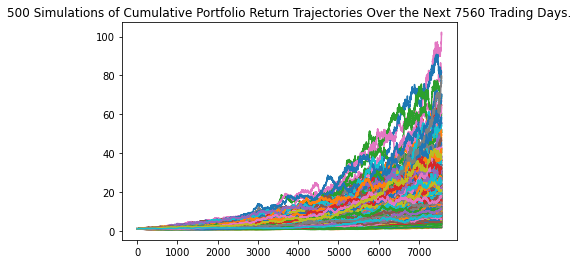

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
portfolio_60_40.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

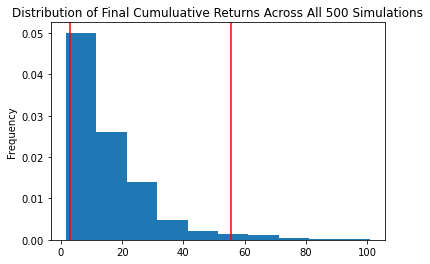

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
portfolio_60_40.plot_distribution()


In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
portfolio_summary_table_60_40 = portfolio_60_40.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(portfolio_summary_table_60_40)

count           500.000000
mean             16.309570
std              13.669797
min               1.579100
25%               7.554289
50%              11.573739
75%              20.969921
max             101.008790
95% CI Lower      2.858432
95% CI Upper     55.627549
Name: 7560, dtype: float64


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


65138.6


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# Multiple the 95% CI Lower and Upper outcomes from the summary table by the initial portfolio value
ci_lower_thirty_cumulative_return = portfolio_summary_table_60_40[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = portfolio_summary_table_60_40[9] * total_stocks_bonds

# Print the result of your calculations
print(f'The lower bound for the expected value of the portfolio with a 95% confidence interval is ${ci_lower_thirty_cumulative_return: .2f}')
print(f'The upper bound for the expected value of the portfolio with a 95% confidence interval is ${ci_upper_thirty_cumulative_return: .2f}')


The lower bound for the expected value of the portfolio with a 95% confidence interval is $ 186194.24
The upper bound for the expected value of the portfolio with a 95% confidence interval is $ 3623500.66


In [37]:
# Now, configure the Monte Carlo simulation to forecast only 10 years cumulative returns to see if the portfolio 
# can support retirement on a shorter time horizon with instead, a higher allocation to stocks
# For 10 years, multiply 252 trading days by 10
# The weights should be split 20% to AGG and 80% to SPY. 
# Place weight of AGG first as it is the first item in portfolio_prices_df.
# Run 500 samples.
portfolio_80_20 = MCSimulation(
    portfolio_data = portfolio_prices_df,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
portfolio_80_20.portfolio_data.head()


AGG                                       \
                             open    high     low     close     volume   
time                                                                     
2018-01-08 00:00:00-05:00  109.11  109.11  108.95  109.0000  2842958.0   
2018-01-09 00:00:00-05:00  108.91  108.91  108.69  108.7100  1991045.0   
2018-01-10 00:00:00-05:00  108.48  108.72  108.43  108.7100  3272935.0   
2018-01-11 00:00:00-05:00  108.66  108.86  108.61  108.7700  2652838.0   
2018-01-12 00:00:00-05:00  108.64  108.83  108.63  108.7401  2950016.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-08 00:00:00-05:00          NaN  273.31  274.10  272.98  273.93   
2018-01-09 00:00:00-05:00    -0.002661  274.40  275.25  274.09  274.53   
2018-01-10 00:00:00-05:00     0.000000  273.69  274.42  272.92  274.10   
2018-01-11 00:00:00-05:00     0.000552  274.75  276.09  274.56  276.08   
2018-01-12 00:00:00-05:00    -0.000275  276.42  278.11  276.27  277.91   

                                                  
                             volume daily_return  
time                                              
2018-01-08 00:00:00-05:00  33627800          NaN  
2018-01-09 00:00:00-05:00  40421422     0.002190  
2018-01-10 00:00:00-05:00  41575815    -0.001566  
2018-01-11 00:00:00-05:00  39159808     0.007224  
2018-01-12 00:00:00-05:00  53855427     0.006629

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
portfolio_80_20.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\mwoji\FinTech-Workspace\Challenge_Files\M5\Module_5_Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994318,1.010587,0.989342,1.007949,1.005623,1.009170,1.012651,0.997671,1.007753,0.993265,...,1.007525,0.995439,0.998089,1.001878,1.008382,1.006948,1.008119,0.987427,1.009176,0.986641
2,0.983607,1.000956,0.999442,1.008476,1.002291,1.001049,1.010653,0.986364,1.009004,0.997281,...,1.020842,1.001696,1.011862,1.018251,1.020720,1.019416,0.986384,0.980859,1.021207,0.994864
3,0.976656,0.996135,1.005622,0.996096,0.993837,1.006018,0.998102,0.994403,1.026375,1.010171,...,1.023381,0.989669,0.993315,1.043196,1.010860,1.026901,0.989536,1.004890,1.005414,0.990581
4,0.978006,0.992881,1.005257,0.987738,0.991546,1.006222,1.007395,1.000218,1.012928,1.005928,...,1.010182,0.997615,0.992680,1.044718,0.979865,1.058677,0.988080,0.992994,1.027560,0.976801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.641829,2.750577,2.231455,5.686990,1.513891,4.980529,2.756651,3.925435,3.066942,4.968376,...,3.680261,2.766826,1.580316,5.124065,3.206508,3.455737,2.590040,2.436817,2.643514,6.998071
2517,4.710628,2.720699,2.239529,5.735147,1.520681,4.965698,2.691099,3.950427,3.064857,5.049759,...,3.625719,2.771853,1.597189,5.062680,3.226084,3.476210,2.587546,2.485832,2.586606,6.983048
2518,4.779426,2.757741,2.242748,5.796247,1.535862,4.999251,2.683077,3.853812,3.121578,5.017073,...,3.660170,2.794904,1.582909,5.160136,3.255858,3.472451,2.578739,2.463016,2.560795,6.908145
2519,4.787418,2.762784,2.238634,5.848037,1.528562,4.971391,2.695383,3.891781,3.178270,5.099510,...,3.716378,2.765584,1.574880,5.147512,3.223026,3.450914,2.608939,2.501352,2.494793,6.967167


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

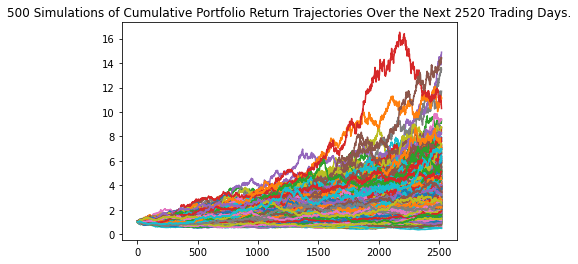

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
portfolio_80_20.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

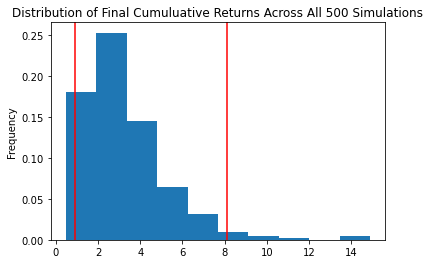

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
portfolio_80_20.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
portfolio_summary_table_80_20 = portfolio_80_20.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(portfolio_summary_table_80_20)

count           500.000000
mean              3.244210
std               1.996211
min               0.472090
25%               1.904997
50%               2.717777
75%               3.941432
max              14.890090
95% CI Lower      0.915491
95% CI Upper      8.104328
Name: 2520, dtype: float64


In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


65138.6


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = portfolio_summary_table_80_20[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = portfolio_summary_table_80_20[9] * total_stocks_bonds

# Print the result of your calculations
print(f'The lower bound for the expected value of the portfolio with a 95% confidence interval is ${ci_lower_ten_cumulative_return: .2f}')
print(f'The upper bound for the expected value of the portfolio with a 95% confidence interval is ${ci_upper_ten_cumulative_return: .2f}')


The lower bound for the expected value of the portfolio with a 95% confidence interval is $ 59633.78
The upper bound for the expected value of the portfolio with a 95% confidence interval is $ 527904.61


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?